# TP Python
## Part 3 : Pi
### Naive Python implementation

In [4]:
import random

def compute_pi_integral(num_trials = 10000):
    step = 1.0/num_trials
    sum = 0
    for i in range(num_trials):
        x = (i-0.5) * step
        sum += 4.0 / (1.0+x*x)
    return sum*step


def compute_pi_metropolis(num_trials = 10000, seed = 12):
    counter = 0
    random.seed(seed)
    for i in range(num_trials):
        x_val = random.random()
        y_val = random.random()
        radius = x_val**2 + y_val**2
        if radius < 1:
            counter += 1
    return 4*counter/num_trials
    

100%|██████████| 4/4 [36:55<00:00, 553.83s/it]


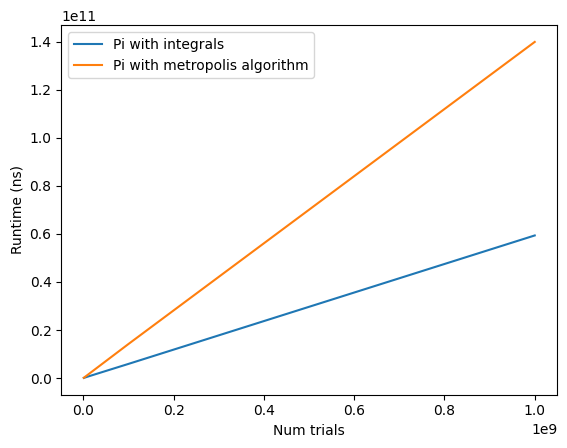

In [5]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral = np.zeros((len(steps), k))
times_metropolis = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral(steps[i])
        times_integral[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis(steps[i])
        times_metropolis[i, j] = time_ns() - t0
        

plt.plot(steps, np.mean(times_integral, axis=1), label="Pi with integrals")
plt.plot(steps, np.mean(times_metropolis, axis=1), label="Pi with metropolis algorithm")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Function generator implementation

In [6]:
def compute_pi_integral_generator(num_trials = 10000):
    step = 1/num_trials
    for i in range(num_trials):
        x = (i-0.5) * step
        yield 4.0 / (1.0+x*x)

def compute_pi_metropolis_generator(num_trials = 10000):
    for i in range(num_trials):
        x_val = random.random()
        y_val = random.random()
        radius = x_val**2 + y_val**2
        if radius < 1:
            yield 1
        else:
            yield 0

100%|██████████| 4/4 [36:28<00:00, 547.22s/it]


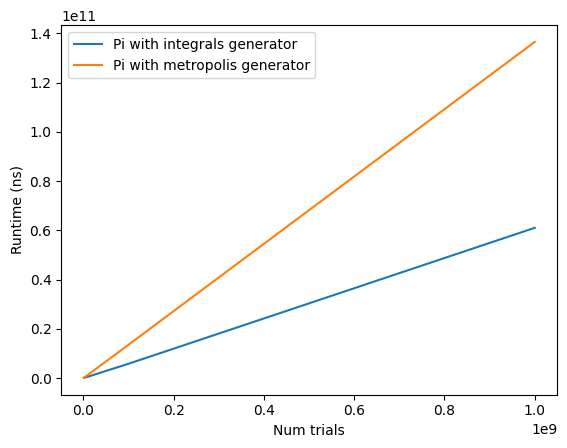

In [7]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral_generator = np.zeros((len(steps), k))
times_metropolis_generator = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        sum(compute_pi_integral_generator(steps[i]))/steps[i]
        times_integral_generator[i, j] = time_ns() - t0
        t0 = time_ns()
        4*sum(compute_pi_metropolis_generator(steps[i]))/steps[i]
        times_metropolis_generator[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_generator, axis=1), label="Pi with integrals generator")
plt.plot(steps, np.mean(times_metropolis_generator, axis=1), label="Pi with metropolis generator")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Lambda implementation

In [8]:
compute_pi_integral_lambda = lambda num_trials=10000: (
    4.0 / (1.0 + ((i - 0.5)/num_trials)**2) for i in range(num_trials)
)

compute_pi_metropolis_lambda = lambda num_trials=10000: (
    1 if random.random()**2 + random.random()**2 < 1 else 0
    for _ in range(num_trials)
)

100%|██████████| 4/4 [40:11<00:00, 602.96s/it]


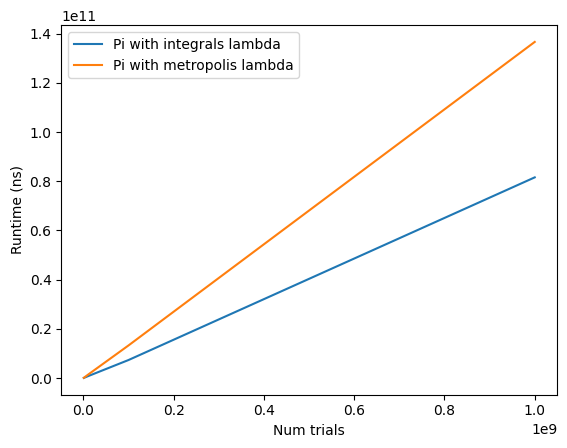

In [11]:
steps = [1000000, 10000000, 100000000, 1000000000]

k = 10
times_integral_lambda = np.zeros((len(steps), k))
times_metropolis_lambda = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        sum(compute_pi_integral_lambda(steps[i]))/steps[i]
        times_integral_lambda[i, j] = time_ns() - t0
        t0 = time_ns()
        4*sum(compute_pi_metropolis_lambda(steps[i]))/steps[i]
        times_metropolis_lambda[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_lambda, axis=1), label="Pi with integrals lambda")
plt.plot(steps, np.mean(times_metropolis_lambda, axis=1), label="Pi with metropolis lambda")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Numpy implementation

In [12]:
import numpy as np

def compute_pi_integral_numpy(num_steps=10000):
    step = 1 / num_steps
    x = (np.arange(num_steps) + 0.5) * step
    return np.sum(4.0 / (1.0 + x*x)) * step

def compute_pi_metropolis_numpy(num_trials=10000):
    x = np.random.rand(num_trials)
    y = np.random.rand(num_trials)
    inside = (x**2 + y**2) < 1
    return 4 * np.sum(inside) / num_trials
    

100%|██████████| 4/4 [20:35<00:00, 308.76s/it]


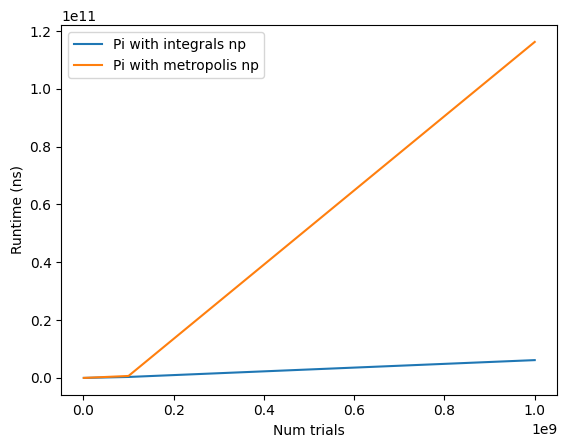

In [14]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral_np = np.zeros((len(steps), k))
times_metropolis_np = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral_numpy(steps[i])
        times_integral_np[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_numpy(steps[i])
        times_metropolis_np[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_np, axis=1), label="Pi with integrals np")
plt.plot(steps, np.mean(times_metropolis_np, axis=1), label="Pi with metropolis np")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Cython implementation

In [15]:
%load_ext cython

In [16]:
%%cython
import numpy as np
cimport numpy as np
from libc.stdlib cimport rand, RAND_MAX


def compute_pi_integral_cython_numpy(int num_steps=10000):
    cdef double[:] x = np.linspace(0.5/num_steps, 1-0.5/num_steps, num_steps)
    cdef double total = 0.0
    cdef int i
    for i in range(num_steps):
        total += 4.0 / (1.0 + x[i]*x[i])
    return total / num_steps

def compute_pi_metropolis_cython_numpy(int num_trials=1000000):
    cdef np.ndarray[np.float64_t, ndim=1] x = np.random.rand(num_trials)
    cdef np.ndarray[np.float64_t, ndim=1] y = np.random.rand(num_trials)
    cdef int inside = 0
    cdef int i
    for i in range(num_trials):
        if x[i]*x[i] + y[i]*y[i] < 1.0:
            inside += 1
    return 4.0 * inside / num_trials

Content of stderr:
Python(16928) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
In file included from /Users/selimbenbouzid/.ipython/cython/_cython_magic_91e04ece29957ab000f9a038b3fd334a224f2f1f342c4fb6a0fa1343c12755a4.c:1148:
In file included from /Users/selimbenbouzid/Work/5IF/Parallel-computing-practical-work/Python/.venv/lib/python3.9/site-packages/numpy/_core/include/numpy/arrayobject.h:5:
In file included from /Users/selimbenbouzid/Work/5IF/Parallel-computing-practical-work/Python/.venv/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12:
In file included from /Users/selimbenbouzid/Work/5IF/Parallel-computing-practical-work/Python/.venv/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909:
/Users/selimbenbouzid/Work/5IF/Parallel-computing-practical-work/Python/.venv/lib/python3.9/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with

100%|██████████| 4/4 [01:14<00:00, 18.56s/it]


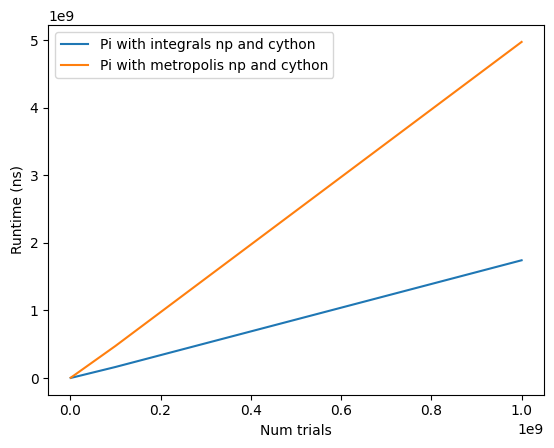

In [17]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral_cython = np.zeros((len(steps), k))
times_metropolis_cython = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral_cython_numpy(steps[i])
        times_integral_cython[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_cython_numpy(steps[i])
        times_metropolis_cython[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_cython, axis=1), label="Pi with integrals np and cython")
plt.plot(steps, np.mean(times_metropolis_cython, axis=1), label="Pi with metropolis np and cython")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Numba implementation

In [33]:
from numba import jit

@jit(nopython=True)
def compute_pi_integral_numba(num_trials = 10000):
    step = 1.0/num_trials
    sum = 0
    for i in range(num_trials):
        x = (i-0.5) * step
        sum += 4.0 / (1.0+x*x)
    return sum*step

@jit(nopython=True)
def compute_pi_metropolis_numba(num_trials = 10000):
    counter = 0.0
    for i in range(num_trials):
        x_val = random.random()
        y_val = random.random()
        radius = x_val**2 + y_val**2
        if radius < 1:
            counter += 1
    return 4*counter/num_trials

In [34]:
from numba import njit, prange

@njit (parallel=True)
def compute_pi_integral_numba_parallel(num_trials = 10000):
    step = 1.0/num_trials
    sum = 0
    for i in prange(num_trials):
        x = (i-0.5) * step
        sum += 4.0 / (1.0+x*x)
    return sum*step

@njit (parallel=True)
def compute_pi_metropolis_numba_parallel(num_trials = 10000):
    counter = 0.0
    for i in prange(num_trials):
        x_val = random.random()
        y_val = random.random()
        radius = x_val**2 + y_val**2
        if radius < 1:
            counter += 1
    return 4*counter/num_trials

In [35]:
from numba import vectorize, float64

@vectorize([float64(float64)])
def integrand_func(x):
    return 4.0 / (1.0 + x * x)

def compute_pi_integral_numba_vect(num_trials = 10000):
    step = 1.0/num_trials
    indices = np.arange(num_trials, dtype=np.float64) 
    x_values = (indices - 0.5) * step
    y_values = integrand_func(x_values)
    sum_val = np.sum(y_values)
    
    return sum_val * step

@vectorize([float64(float64, float64)])
def check_inside_circle(x, y):
    if (x**2 + y**2) < 1.0:
        return 1.0
    else:
        return 0.0
    
def compute_pi_metropolis_numba_vectorize(num_trials=10000, seed=12):
    rng = np.random.default_rng(seed)
    x_vals = rng.random(num_trials)
    y_vals = rng.random(num_trials)

    hits_array = check_inside_circle(x_vals, y_vals)
    counter = np.sum(hits_array)
    
    return 4.0 * counter / num_trials

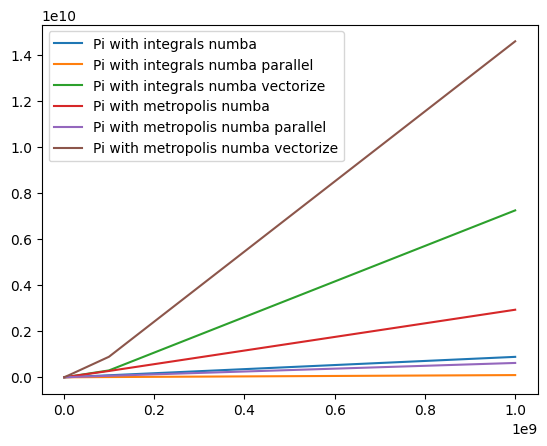

In [ ]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

#Run numba for compiling
compute_pi_integral_numba(2)
compute_pi_integral_numba_parallel(2)
compute_pi_integral_numba_vect(2)
compute_pi_metropolis_numba(2)
compute_pi_metropolis_numba_parallel(2)
compute_pi_metropolis_numba_vectorize(2)

times_integral_numba = np.zeros((len(steps), k))
times_metropolis_numba = np.zeros((len(steps), k))
times_integral_numba_parallel = np.zeros((len(steps), k))
times_metropolis_numba_parallel = np.zeros((len(steps), k))
times_integral_numba_vectorize = np.zeros((len(steps), k))
times_metropolis_numba_vectorize = np.zeros((len(steps), k))

for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral_numba(steps[i])
        times_integral_numba[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_numba(steps[i])
        times_metropolis_numba[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_integral_numba_parallel(steps[i])
        times_integral_numba_parallel[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_integral_numba_vect(steps[i])
        times_integral_numba_vectorize[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_numba_parallel(steps[i])
        times_metropolis_numba_parallel[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_numba_vectorize(steps[i])
        times_metropolis_numba_vectorize[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_numba, axis=1), label="Pi with integrals numba")
plt.plot(steps, np.mean(times_integral_numba_parallel, axis=1), label="Pi with integrals numba parallel")
plt.plot(steps, np.mean(times_integral_numba_vectorize, axis=1), label="Pi with integrals numba vectorize")
plt.plot(steps, np.mean(times_metropolis_numba, axis=1), label="Pi with metropolis numba")
plt.plot(steps, np.mean(times_metropolis_numba_parallel, axis=1), label="Pi with metropolis numba parallel")
plt.plot(steps, np.mean(times_metropolis_numba_vectorize, axis=1), label="Pi with metropolis numba vectorize")
plt.legend()

### Panda implementation

In [22]:
import pandas as pd
import numpy as np

def compute_pi_integral_pandas(num_trials=10000):
    step = 1.0 / num_trials
    indices = pd.Series(range(num_trials))
    x = (indices - 0.5) * step
    y = 4.0 / (1.0 + x**2)
    
    return y.sum() * step

def compute_pi_metropolis_pandas(num_trials=10000, seed=12):
    np.random.seed(seed)
    
    df = pd.DataFrame({
        'x': np.random.uniform(0, 1, num_trials),
        'y': np.random.uniform(0, 1, num_trials)
    })
    df['radius_sq'] = df['x']**2 + df['y']**2
    hits = (df['radius_sq'] < 1.0).sum()
    
    return 4.0 * hits / num_trials

100%|██████████| 4/4 [39:57<00:00, 599.31s/it]


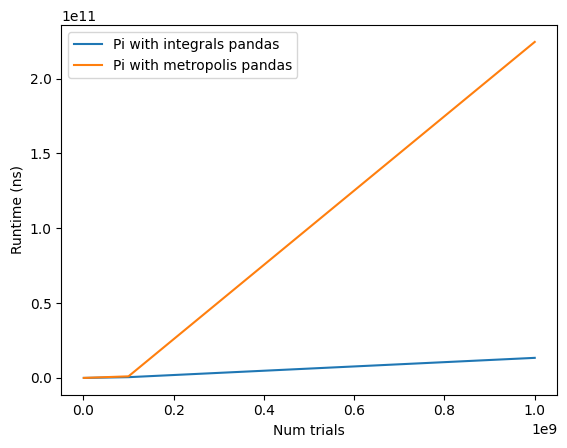

In [23]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral_pandas = np.zeros((len(steps), k))
times_metropolis_pandas = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral_pandas(steps[i])
        times_integral_pandas[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_pandas(steps[i])
        times_metropolis_pandas[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_pandas, axis=1), label="Pi with integrals pandas")
plt.plot(steps, np.mean(times_metropolis_pandas, axis=1), label="Pi with metropolis pandas")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Dask implementation

In [24]:
import dask.array as da

def compute_pi_integral_dask(num_trials=10000, chunk_size=1_000_000):
    step = 1.0 / num_trials
    indices = da.arange(num_trials, chunks=chunk_size)
    
    x = (indices - 0.5) * step
    y = 4.0 / (1.0 + x**2)
    result = y.sum() * step

    return result.compute()

def compute_pi_metropolis_dask(num_trials=10000, seed=12, chunk_size=1_000_000):
    rs = da.random.RandomState(seed)
    
    x = rs.uniform(0, 1, size=num_trials, chunks=chunk_size)
    y = rs.uniform(0, 1, size=num_trials, chunks=chunk_size)

    radius_sq = x**2 + y**2

    hits = (radius_sq < 1.0).sum()

    return 4.0 * hits.compute() / num_trials

100%|██████████| 4/4 [00:57<00:00, 14.27s/it]


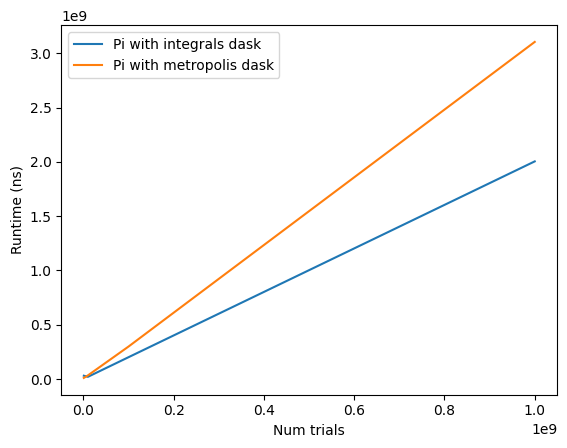

In [25]:
steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

times_integral_dask = np.zeros((len(steps), k))
times_metropolis_dask = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        t0 = time_ns()
        compute_pi_integral_dask(steps[i])
        times_integral_dask[i, j] = time_ns() - t0
        t0 = time_ns()
        compute_pi_metropolis_dask(steps[i])
        times_metropolis_dask[i, j] = time_ns() - t0

plt.plot(steps, np.mean(times_integral_dask, axis=1), label="Pi with integrals dask")
plt.plot(steps, np.mean(times_metropolis_dask, axis=1), label="Pi with metropolis dask")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend()

### Final plots
Everything

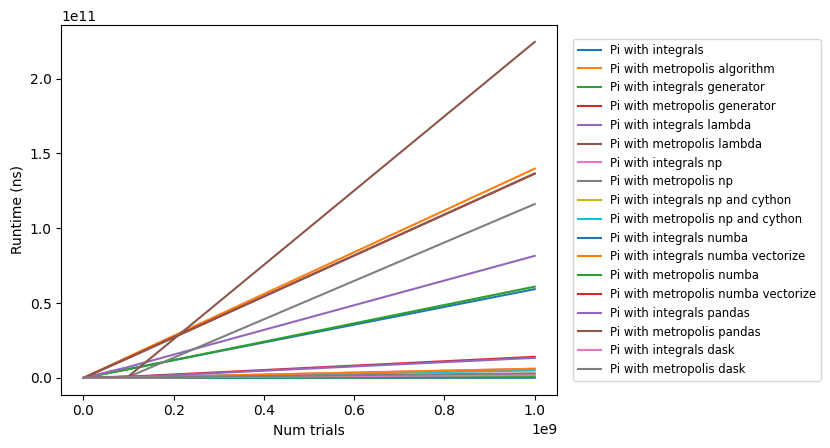

In [26]:
plt.plot(steps, np.mean(times_integral, axis=1), label="Pi with integrals")
plt.plot(steps, np.mean(times_metropolis, axis=1), label="Pi with metropolis algorithm")
plt.plot(steps, np.mean(times_integral_generator, axis=1), label="Pi with integrals generator")
plt.plot(steps, np.mean(times_metropolis_generator, axis=1), label="Pi with metropolis generator")
plt.plot(steps, np.mean(times_integral_lambda, axis=1), label="Pi with integrals lambda")
plt.plot(steps, np.mean(times_metropolis_lambda, axis=1), label="Pi with metropolis lambda")
plt.plot(steps, np.mean(times_integral_np, axis=1), label="Pi with integrals np")
plt.plot(steps, np.mean(times_metropolis_np, axis=1), label="Pi with metropolis np")
plt.plot(steps, np.mean(times_integral_cython, axis=1), label="Pi with integrals np and cython")
plt.plot(steps, np.mean(times_metropolis_cython, axis=1), label="Pi with metropolis np and cython")
plt.plot(steps, np.mean(times_integral_numba_parallel, axis=1), label="Pi with integrals numba")
plt.plot(steps, np.mean(times_integral_numba_vectorize, axis=1), label="Pi with integrals numba vectorize")
plt.plot(steps, np.mean(times_metropolis_numba_parallel, axis=1), label="Pi with metropolis numba")
plt.plot(steps, np.mean(times_metropolis_numba_vectorize, axis=1), label="Pi with metropolis numba vectorize")
plt.plot(steps, np.mean(times_integral_pandas, axis=1), label="Pi with integrals pandas")
plt.plot(steps, np.mean(times_metropolis_pandas, axis=1), label="Pi with metropolis pandas")
plt.plot(steps, np.mean(times_integral_dask, axis=1), label="Pi with integrals dask")
plt.plot(steps, np.mean(times_metropolis_dask, axis=1), label="Pi with metropolis dask")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize="small"
)



Pi Integrals

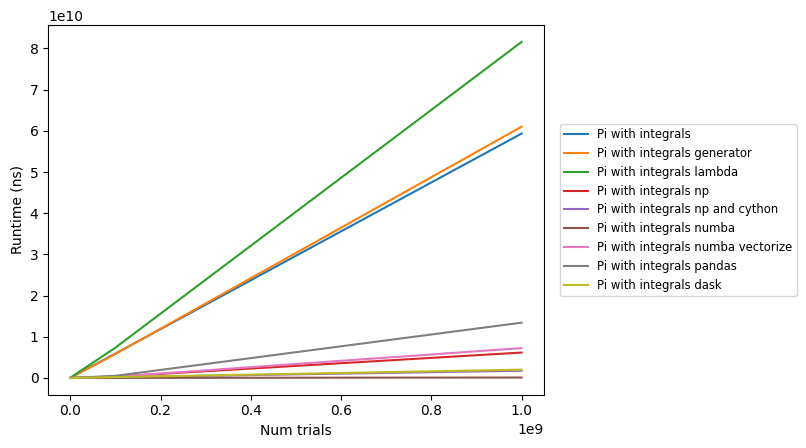

In [38]:
plt.plot(steps, np.mean(times_integral, axis=1), label="Pi with integrals")
plt.plot(steps, np.mean(times_integral_generator, axis=1), label="Pi with integrals generator")
plt.plot(steps, np.mean(times_integral_lambda, axis=1), label="Pi with integrals lambda")
plt.plot(steps, np.mean(times_integral_np, axis=1), label="Pi with integrals np")
plt.plot(steps, np.mean(times_integral_cython, axis=1), label="Pi with integrals np and cython")
plt.plot(steps, np.mean(times_integral_numba_parallel, axis=1), label="Pi with integrals numba")
plt.plot(steps, np.mean(times_integral_numba_vectorize, axis=1), label="Pi with integrals numba vectorize")
plt.plot(steps, np.mean(times_integral_pandas, axis=1), label="Pi with integrals pandas")
plt.plot(steps, np.mean(times_integral_dask, axis=1), label="Pi with integrals dask")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize="small"
)

Pi Metropolis

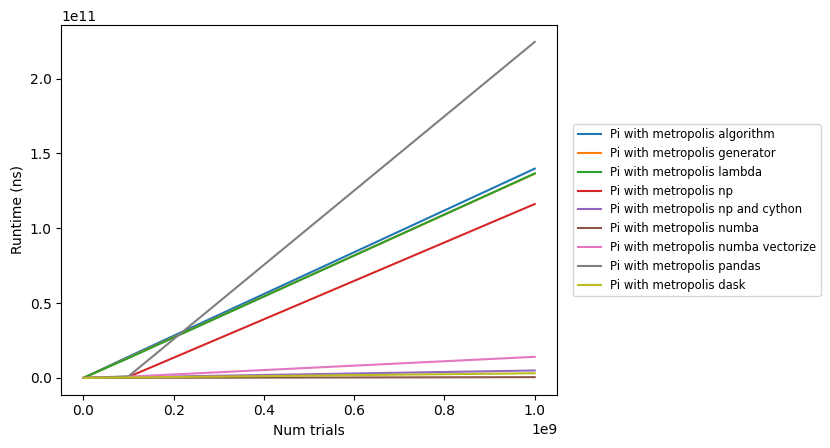

In [29]:
plt.plot(steps, np.mean(times_metropolis, axis=1), label="Pi with metropolis algorithm")
plt.plot(steps, np.mean(times_metropolis_generator, axis=1), label="Pi with metropolis generator")
plt.plot(steps, np.mean(times_metropolis_lambda, axis=1), label="Pi with metropolis lambda")
plt.plot(steps, np.mean(times_metropolis_np, axis=1), label="Pi with metropolis np")
plt.plot(steps, np.mean(times_metropolis_cython, axis=1), label="Pi with metropolis np and cython")
plt.plot(steps, np.mean(times_metropolis_numba_parallel, axis=1), label="Pi with metropolis numba")
plt.plot(steps, np.mean(times_metropolis_numba_vectorize, axis=1), label="Pi with metropolis numba vectorize")
plt.plot(steps, np.mean(times_metropolis_pandas, axis=1), label="Pi with metropolis pandas")
plt.plot(steps, np.mean(times_metropolis_dask, axis=1), label="Pi with metropolis dask")
plt.xlabel("Num trials")
plt.ylabel("Runtime (ns)")
plt.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize="small"
)

Accuracy

100%|██████████| 4/4 [01:25<00:00, 21.45s/it]


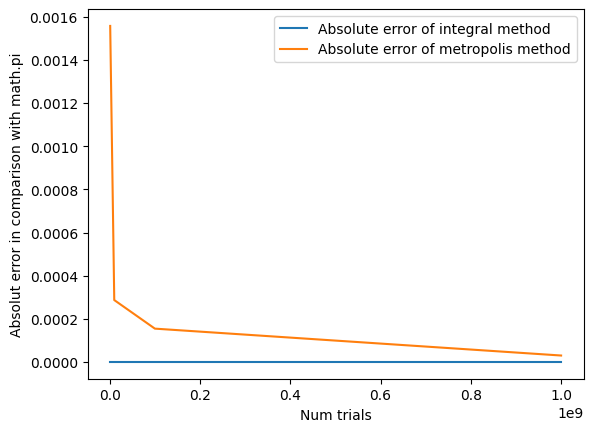

In [31]:
import math

steps = [1000000, 10000000, 100000000, 1000000000]
k = 10

error_integrals = np.zeros((len(steps), k))
error_metropolis = np.zeros((len(steps), k))
for i in tqdm(range(len(steps))):
    for j in range(k):
        error_integrals[i, j] = abs(compute_pi_integral_cython_numpy(steps[i])-math.pi)
        error_metropolis[i, j] = abs(compute_pi_metropolis_cython_numpy(steps[i])-math.pi)

plt.plot(steps, np.mean(error_integrals, axis=1), label="Absolute error of integral method")
plt.plot(steps, np.mean(error_metropolis, axis=1), label="Absolute error of metropolis method")
plt.xlabel("Num trials")
plt.ylabel("Absolut error in comparison with math.pi")
plt.legend()
